## Table Of Contents:
- [*Friday, October 5*](#oct5)
- [**Data Preprocessing**](#1)
- [Import 1](#import1)


- [*Tuesday, October 9*](#oct9)
- [200 ms batches vs `stim_train`](#200-ms-vs-stim)


- [*Wednesday, October 10*](#oct10)
- [**Autoencoder**](#autoenc)
- [Import 2](#import2)

# Data Preprocessing <a class="anchor" id="1"></a>
### Friday, October 5  <a class="anchor" id="oct5"></a>

> Please find attached an exemplar input file for the simulations we are running.

> I also attached a dictionary with the X and Z coordinate of each innervating fiber.

> Stimuli are presented every 200 ms.

#### Import 1 <a class="anchor" id="import1"></a>

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
np.set_printoptions(suppress=True)

In [240]:
with open('data/input/proj_xz.pkl', 'rb') as f:
    xz = pkl.load(f, encoding='latin1')

In [3]:
xz_array = np.zeros((1, 2))
keys = []
for key in xz:
    keys.append(key)
    xz_array = np.concatenate((xz_array, xz[key].reshape((1, 2))), axis=0)
keys = np.array(keys).reshape(-1, 1)
xz_array = np.concatenate((keys, xz_array[1:]), axis=1)

In [246]:
xz_array

array([[ 221184.   ,     489.488,     591.93 ],
       [ 221185.   ,     206.701,     563.71 ],
       [ 221186.   ,     319.906,     457.568],
       ..., 
       [ 221181.   ,     250.45 ,     495.846],
       [ 221182.   ,     479.566,     650.127],
       [ 221183.   ,     391.449,     464.526]])

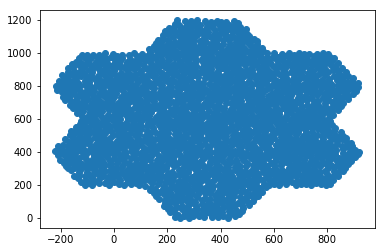

In [5]:
plt.scatter(xz_array[:, 1], xz_array[:, 2]) # background hexagonal structure
plt.show()

### Tuesday, October 9  <a class="anchor" id="oct9"></a>
- `"input.dat"` contains spiking times paired with GIDs (global IDs)
- Patterns go in 200 ms packs
- To make pictures, add up activities over each 200 ms

In [6]:
input_ = np.loadtxt('data/input/input.dat', skiprows=1)
input_ = np.flip(input_, axis=1)

In [7]:
print(input_)
print(input_.shape)

[[ 221184.          1200.406006]
 [ 221184.          1801.768311]
 [ 221184.          1864.717529]
 ..., 
 [ 221183.         26553.761719]
 [ 221183.         27957.466797]
 [ 221183.         29371.466797]]
(77654, 2)


In [8]:
print("Avg fibres per spike time: {}".format(input_.shape[0] / np.unique(input_[:, 1]).shape[0]))

Avg fibres per spike time: 21.685004188774087


In [9]:
# Take all GIDs for each unique spike time.
times = np.unique(input_[:, 1])
times_ids = [input_[:, 0][np.argwhere(input_ == i)[:, 0]] for i in times]

In [10]:
times_ids[0]

array([ 220747.,  220750.,  220756.,  220762.,  220765.,  220773.,
        220774.,  220778.,  220781.,  220786.,  220788.,  220796.,
        220801.,  220806.,  220808.,  220809.,  220821.,  220826.,
        220828.,  220837.,  220849.,  220862.,  220873.,  220898.])

In [11]:
# Translate GIDs into coordinates for each spike time.
times_xz = []
for ids in times_ids:
    a = [xz_array[np.argwhere(xz_array == id_)[:, 0], :] for id_ in ids]
    times_xz.append(np.concatenate(a))

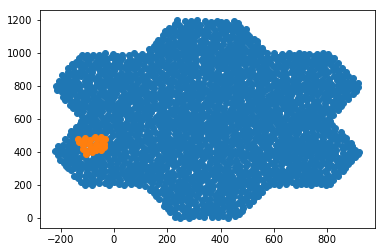

In [12]:
plt.scatter(xz_array[:, 1], xz_array[:, 2]) # background hexagonal structure
plt.scatter(times_xz[0][:, 1], times_xz[0][:, 2]) # single spike time pattern
plt.show()

In [226]:
# Bin spike times into 200 ms intervals.
def batch(times, ms):
    batches_num = []
    batch_num = 0
    i_start = 0
    for i, time in enumerate(times):
        num = int(time // ms)
        if num > batch_num:
            batch_num = num
            batches_num.append(slice(i_start, i))
            i_start = i
        if i == len(times)-1:
            batches_num.append(slice(i_start, i+1))
    # Skip first second of random spiking.
    batches_num = batches_num[5:]
    return batches_num

In [227]:
batches_200 = batch(times, 200)

In [228]:
len(batches_200)

145

In [14]:
stim_train = [249980, 397555, 446691, 205315, 397555, 249980, \
              757795, 397555, 740558, 249980, 397555, 249980, \
              766947, 740558, 446691, 766947, 205315, 205315, \
              766947, 515018, 740558, 740558, 249980, 515018, \
              757795, 740558, 515018, 397555, 740558, 249980, \
              446691, 397555, 757795, 766947, 757795, 397555, \
              766947, 740558, 446691, 766947, 205315, 740558, \
              757795, 515018, 397555, 397555, 249980, 515018, \
              205315, 446691, 205315, 205315, 446691, 740558, \
              446691, 205315, 249980, 515018, 766947, 446691, \
              757795, 397555, 757795, 397555, 757795, 515018, \
              740558, 757795, 446691, 397555, 249980, 446691, \
              515018, 515018, 446691, 515018, 766947, 249980, \
              515018, 757795, 766947, 205315, 740558, 515018, \
              205315, 740558, 205315, 766947, 740558, 249980, \
              205315, 205315, 515018, 740558, 515018, 446691, \
              397555, 757795, 766947, 515018, 397555, 205315, \
              397555, 397555, 205315, 249980, 740558, 397555, \
              757795, 249980, 757795, 766947, 446691, 757795, \
              766947, 766947, 446691, 446691, 757795, 515018, \
              446691, 446691, 766947, 740558, 740558, 766947, \
              515018, 249980, 757795, 446691, 249980, 766947, \
              205315, 446691, 249980, 766947, 757795, 249980, \
              249980, 397555, 515018, 757795, 249980, 397555, 205315]

In [15]:
stim_train = np.array(stim_train)

In [16]:
np.unique(stim_train)

array([205315, 249980, 397555, 446691, 515018, 740558, 757795, 766947])

In [17]:
len(stim_train)

145

In [60]:
# Make an animation representing all relevant 200 ms batches.
fig, ax = plt.subplots()
ax.scatter(xz_array[:, 1], xz_array[:, 2])
ln, = ax.plot([], [], 'ro', alpha=0.5, animated=True)

def update(frame):
    xz = np.vstack(times_xz[batches_200[frame]])
    ln.set_data(xz[:, 1], xz[:, 2])
    return ln,

ani = animation.FuncAnimation(fig, update, frames=len(batches_200),\
                              interval=200, blit=True)
ani.save("data/batches_200.mp4")

## 200 ms batches vs `stim_train`  <a class="anchor" id="200-ms-vs-stim"></a>
Check whether the 200 ms batches correctly represent `stim_train`.

In [61]:
# Contains GIDs for each 200 ms batch.
times_batched = [np.sort(np.vstack(times_xz[batch])[:, 0]) for batch in batches_200]

In [62]:
len(times_batched)

145

In [63]:
# Hash to check unique batches.
times_batched_hashed = [hash(batch.tostring()) for batch in times_batched]

In [64]:
np.unique(times_batched_hashed).shape

(145,)

This means that every batch has a unique set of fibres, which is how it should be.

[  3  16  17  40  48  50  51  55  81  84  86  90  91 101 104 132 144]


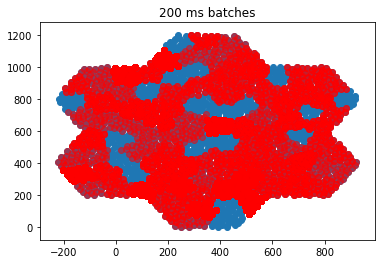

In [70]:
# Pick all indices from `stim_train` with the same specific value (representing the same pattern).
# 200 ms batches
pick = np.argwhere(stim_train == 205315).reshape(-1)
print(pick)
plt.title('200 ms batches')
plt.scatter(xz_array[:, 1], xz_array[:, 2]) # background hexagonal structure
for i in pick:
    xz = np.vstack(times_xz[batches_200[i]])
    plt.scatter(xz[:, 1], xz[:, 2], c='r', alpha=0.5)
plt.show()

### Wednesday, October 10 <a class="anchor" id="oct10"></a>

In [71]:
fig, ax = plt.subplots()
ax.scatter(xz_array[:, 1], xz_array[:, 2])
ln, = ax.plot([], [], 'ro', alpha=0.5, animated=True)

def update(frame):
    xz = np.vstack(times_xz[batches_200[pick[frame]]])
    ln.set_data(xz[:, 1], xz[:, 2])
    return ln,

ani = animation.FuncAnimation(fig, update, frames=len(pick),\
                              interval=200, blit=True)
ani.save("data/205315.mp4")

In [130]:
len(xz)

564

In [127]:
len(np.unique(xz, axis=0))

435

This shows that there are repetitive GID-coordinates pairs in `xz`.

**UPD** Actually, this shows nothing more than my inattentiveness to global variables :(

`xz` was altered during plotting, and then I forgot that `xz` should have been the initial readout, not the array, which is `xz_array` (below).

In [247]:
len(xz_array)

2170

In [249]:
len(np.unique(xz_array, axis=0))

2170

**Don't take anything below seriously, I'll manage the next time.**

In [162]:
# Just to make sure that each repetitive GID have the same coordinates.
d = {}
for ind, val in enumerate(xz[:, 0]):
    if val in d.keys():
        d[val].append(ind)
    else:
        d[val] = [ind]
        
count = 0
for key in d.keys():
    if len(d[key]) > 1 and count < 5:
        for val in d[key]:
            print(xz[val, 1:])
        print('\n')
        count += 1

[ 339.865  153.699]
[ 339.865  153.699]


[ 361.288  150.086]
[ 361.288  150.086]


[ 314.608  145.888]
[ 314.608  145.888]


[ 294.087  144.911]
[ 294.087  144.911]


[ 341.444  123.917]
[ 341.444  123.917]




In [136]:
xz_unique = np.unique(xz, axis=0)

In [163]:
# Dictionary for counts encoding to feed to the NN.
GID_to_num = {val: ind for ind, val in enumerate(xz_unique[:, 0])}

In [167]:
batch_gids = np.vstack(times_xz[batches_200[0]])[:, 0]
batch_gids[:10]

array([ 220422.,  220423.,  220424.,  220425.,  220426.,  220427.,
        220428.,  220429.,  220430.,  220431.])

In [168]:
gid_nums = [GID_to_num[key] for key in batch_gids]
gids

KeyError: 221372.0

The script encountered a GID that is not in `xz`. Let's double check.

In [170]:
221372.0 in GID_to_num.keys()

False

In [171]:
221372.0 in xz[:, 0]

False

Let's now count all the GIDs that are not on the XZ coordinates list (`xz`).

In [182]:
gids_not_in_xz = {}
inds_to_drop = []
for ind, gid in enumerate(input_[:, 0]):
    if gid not in GID_to_num.keys():
        inds_to_drop.append(ind)
        if gid not in gids_not_in_xz.keys():
            gids_not_in_xz[gid] = 1
        else:
            gids_not_in_xz[gid] += 1

In [238]:
len(xz)

564

In [177]:
len(gids_not_in_xz)

1735

In [176]:
len(input_)

77654

In [239]:
len(inds_to_drop)

56258

I'll just get rid of them for now.

In [183]:
new_input = np.delete(input_, inds_to_drop, 0)

In [187]:
new_input[:, 0] = [GID_to_num[gid] for gid in new_input[:, 0]]

In [188]:
new_input

array([[   203.      ,    883.354553],
       [   203.      ,   2603.540283],
       [   203.      ,   2613.555664],
       ..., 
       [   202.      ,  28690.726562],
       [   202.      ,  29802.4375  ],
       [   202.      ,  29807.978516]])

In [237]:
len(new_input)

21396

In [195]:
new_times = np.unique(new_input[:, 1])
new_times_nums = [new_input[:, 0][np.argwhere(new_input == i)[:, 0]] for i in new_times]

In [229]:
new_batches_200 = batch(new_times, 200)

In [235]:
len(new_batches_200)

144

In [236]:
new_batches_200

[slice(22, 24, None),
 slice(24, 29, None),
 slice(29, 45, None),
 slice(45, 51, None),
 slice(51, 57, None),
 slice(57, 63, None),
 slice(63, 68, None),
 slice(68, 80, None),
 slice(80, 87, None),
 slice(87, 89, None),
 slice(89, 96, None),
 slice(96, 101, None),
 slice(101, 113, None),
 slice(113, 121, None),
 slice(121, 126, None),
 slice(126, 140, None),
 slice(140, 155, None),
 slice(155, 159, None),
 slice(159, 161, None),
 slice(161, 171, None),
 slice(171, 180, None),
 slice(180, 187, None),
 slice(187, 192, None),
 slice(192, 196, None),
 slice(196, 207, None),
 slice(207, 211, None),
 slice(211, 214, None),
 slice(214, 225, None),
 slice(225, 232, None),
 slice(232, 237, None),
 slice(237, 241, None),
 slice(241, 244, None),
 slice(244, 248, None),
 slice(248, 254, None),
 slice(254, 259, None),
 slice(259, 263, None),
 slice(263, 272, None),
 slice(272, 277, None),
 slice(277, 280, None),
 slice(280, 298, None),
 slice(298, 306, None),
 slice(306, 308, None),
 slice(308, 312

In [230]:
x_data = []
for batch in new_batches_200:
    nums = np.concatenate(new_times_nums[new_batches_200[0]]).astype(np.int_)
    data = np.bincount(nums)
    data = np.concatenate((data, np.zeros(len(GID_to_num.keys()) - len(data))))
    x_data.append(data)
x_data = np.array(x_data)

In [231]:
x_data

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]])

In [232]:
np.random.seed(42)
x_data_shuffled = x_data
np.random.shuffle(x_data_shuffled)

In [233]:
x_train = x_data_shuffled[:int(len(x_data_shuffled)*0.8)]
x_test = x_data_shuffled[int(len(x_data_shuffled)*0.8):]

In [234]:
x_train.shape, x_test.shape

((115, 435), (29, 435))

# Autoencoder <a class="anchor" id="autoenc"></a>
#### Import 2 <a class="anchor" id="import2"></a>

In [219]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model
from keras import regularizers

In [220]:
def build_autoenc(encoding_dim=8, input_shape=(435,), sparsity=0):

    # this is the size of our encoded representations
    encoding_dim = encoding_dim

    # this is our input placeholder
    input_img = Input(shape=input_shape)
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='relu', \
                    activity_regularizer=regularizers.l1(sparsity))(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(input_shape[0], activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded (encoding_dim-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(encoded_input, decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')  

    return autoencoder, encoder, decoder

In [221]:
autoencoder, encoder, decoder = build_autoenc()

In [222]:
history = autoencoder.fit(x_train, x_train, \
                          epochs=100, \
                          batch_size=256, \
                          shuffle=True, \
                          validation_data=(x_test, x_test), \
                          verbose=2)

Train on 119 samples, validate on 30 samples
Epoch 1/100
 - 0s - loss: 0.6945 - val_loss: 0.6935
Epoch 2/100
 - 0s - loss: 0.6935 - val_loss: 0.6926
Epoch 3/100
 - 0s - loss: 0.6926 - val_loss: 0.6917
Epoch 4/100
 - 0s - loss: 0.6917 - val_loss: 0.6909
Epoch 5/100
 - 0s - loss: 0.6909 - val_loss: 0.6900
Epoch 6/100
 - 0s - loss: 0.6900 - val_loss: 0.6891
Epoch 7/100
 - 0s - loss: 0.6891 - val_loss: 0.6882
Epoch 8/100
 - 0s - loss: 0.6882 - val_loss: 0.6872
Epoch 9/100
 - 0s - loss: 0.6872 - val_loss: 0.6861
Epoch 10/100
 - 0s - loss: 0.6861 - val_loss: 0.6849
Epoch 11/100
 - 0s - loss: 0.6849 - val_loss: 0.6837
Epoch 12/100
 - 0s - loss: 0.6837 - val_loss: 0.6823
Epoch 13/100
 - 0s - loss: 0.6823 - val_loss: 0.6807
Epoch 14/100
 - 0s - loss: 0.6807 - val_loss: 0.6789
Epoch 15/100
 - 0s - loss: 0.6789 - val_loss: 0.6769
Epoch 16/100
 - 0s - loss: 0.6769 - val_loss: 0.6746
Epoch 17/100
 - 0s - loss: 0.6746 - val_loss: 0.6721
Epoch 18/100
 - 0s - loss: 0.6721 - val_loss: 0.6692
Epoch 19/1

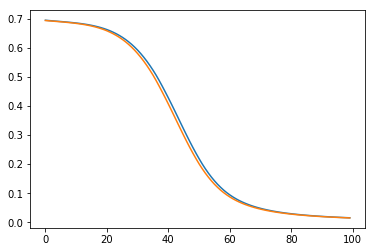

In [225]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()